# My Titanic Work

This is my frist jupyter notebook work

In [48]:
# Initialize Notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, Normalizer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Import both training and test data.

In [49]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


Let's take a look on header and first five column of the training and test data.
$x=\frac{1}{7}$

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Shape and size of the data.

In [52]:
train.shape,test.shape

((891, 12), (418, 11))

Lets try to see the statisticts of the data using pandas describe method.

In [53]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Lets see catagorical description of the data

In [55]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dahlberg, Miss. Gerda Ulrika",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [56]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Spedden, Master. Robert Douglas",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [57]:
train.dropna()
train.shape

(891, 12)

Lets plot some the charts to see the visual representation of the data against survival.


Text(0.5, 1.0, 'Survival Rate by Embarked')

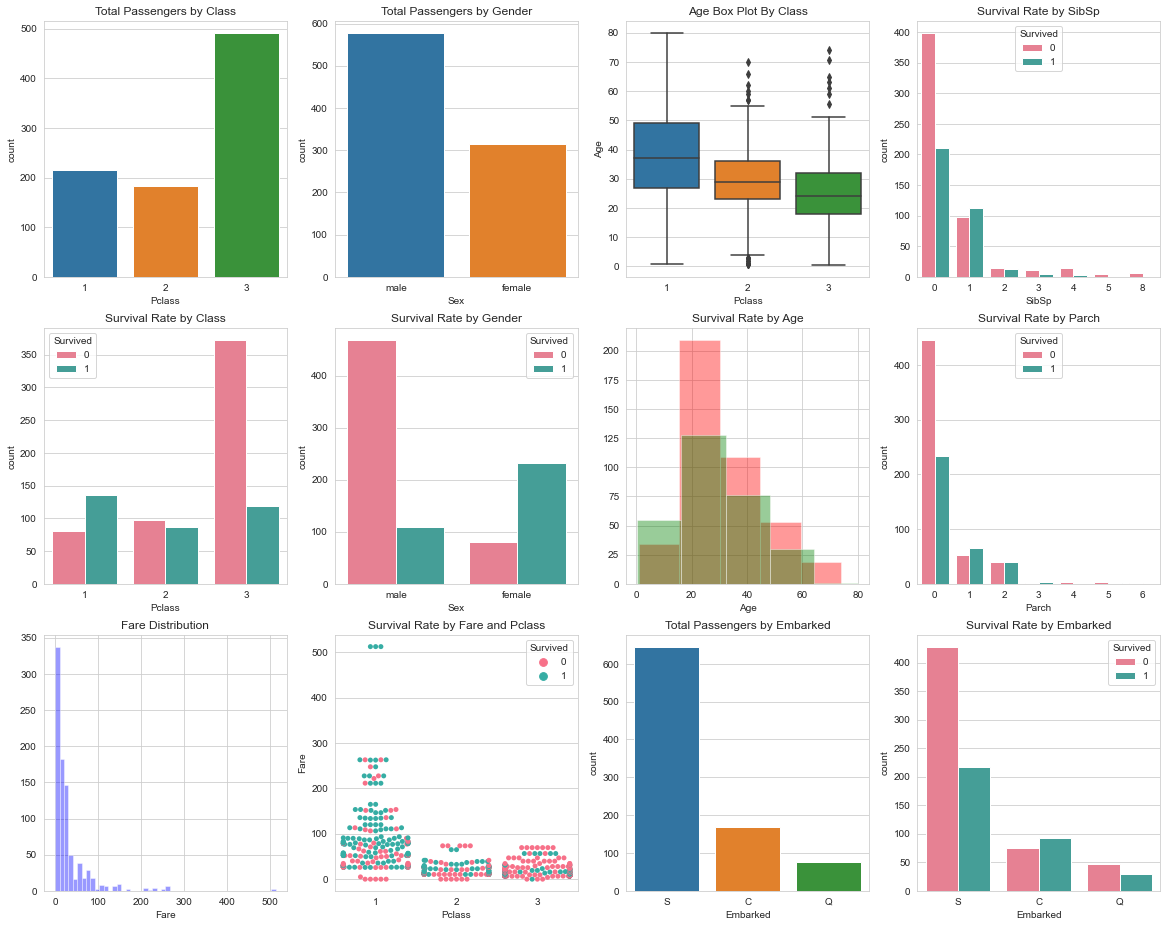

In [58]:
f,ax = plt.subplots(3,4,figsize=(20,16))
sns.countplot('Pclass',data=train,ax=ax[0,0])
sns.countplot('Sex',data=train,ax=ax[0,1])
sns.boxplot(x='Pclass',y='Age',data=train,ax=ax[0,2])
sns.countplot('SibSp',hue='Survived',data=train,ax=ax[0,3],palette='husl')
sns.distplot(train['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')
sns.countplot('Embarked',data=train,ax=ax[2,2])

sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1,0],palette='husl')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1,1],palette='husl')
sns.distplot(train[train['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(train[train['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='g',bins=5)
sns.countplot('Parch',hue='Survived',data=train,ax=ax[1,3],palette='husl')
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train,palette='husl',ax=ax[2,1])
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[2,3],palette='husl')

ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gender')
ax[0,2].set_title('Age Box Plot By Class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Pclass')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

> Some useful information:
* Clearly, we can see most passengers are in class 3, which have least survival probability here
* From Sex attribute, we can see total male Passengers is almost 2 times of female passengers, but lower survival probability maybe male passengers tend to save their lady first?
* From the figure above, we can try to input missing ages by class:
    * Pclass 1, median Age is approximately = 37
    * Pclass 2, median Age is approximately = 29
    * Pclass 3, median Age is approximately = 24
* Ages have right-skewed distributions so median is a better measure of central tendency than mean
* It seems that passengers with Sibling/Spouse or have Parent/Children aboard, have higher survival rates than passengers who are alone!

In [59]:
train['Cabin'].value_counts().head()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
Name: Cabin, dtype: int64

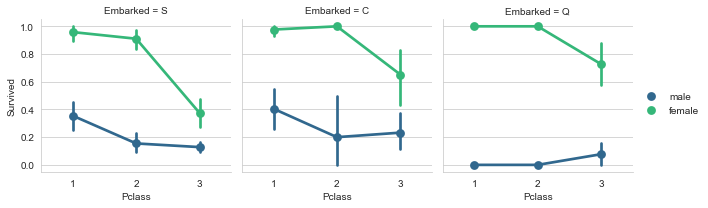

In [60]:
g = sns.FacetGrid(col='Embarked', data=train)
g.map(sns.pointplot,'Pclass', 'Survived', 'Sex', palette='viridis', hue_order=['male', 'female'])
g.add_legend()

Information from visualizations above:
* Female passengers who embarked from C and Q have high survival rate
* Female passengers who embarked from Queenstown in Class 1 and 2 all survived!
* Male passengers who embarked from Queenstown in Class 1 and 2 have the lowest survival rate!

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**C. SUMMARY**

This is a summary of our dataset and plan:
* **Survived:**
    * The value we should predict using test dataset. It is numerical with binary value 0 (Dead) and 1 (Survived)
    
* **Pclass:**
    * The data type is categorical, level of measurement is qualitative->ordinal, since the level seems like 1>2>3.
    * Since this is an ordinal, maybe we should **scale its value from 0 to 1** so we can keep the level information from this variable.
    
* **Name:**
    * The data type is categorical, level of measurement is qualitative->nominal.
    * We should include this variable in **Feature Engineering** process to extract the title value which maybe could improve our prediction result.
    
* **Sex:**
    * The data type is categorical, level of measurement is qualitative->nominal.
    * Since this is a categorical, maybe we should change the value to binary value 0 for male and 1 for female. We'll do this on **Data Preparation** process.
    
* **Age:**
    * The data type is numerical->continuous with level of measurement quantitative->ratio.
    * We should fill the **missing values**
    * For a more meaningful analysis on age, it's better to change the level of measurement to quantitative->interval, by grouping the ages (maybe 1. Children/ Teenagers, 2. Young adults, 3. Adults, 4. Middle-aged and 5. Seniors) in the **Feature Engineering** process.
    * Ages have right-skewed distributions so median is a better measure of central tendency than mean
    
* **SibSp & Parch:**
    * The data type is numerical, level of measurement is quantitative->ratio.
    * Passenger with Sibling/Spouse, or have parent/children aboard, have higher survival rate than passenger which is alone!
    * So I'll create a new feature based on this attribute called 'is_alone', I'll do this on **Feature engineering** process.
    
* **Ticket:**
    * *Let's drop this for now.*
    
* **Fare:**
    * The data type is numerical->continuous with level of measurement is quantitative->ratio.
    * There is 1 missing value in test dataset
    * Since it seems there is an increasing level of passenger based on the Fare, I'll just scale the value of this variable from 0 to 1 in **Feature Engineering** process.
    
* **Cabin:**
    * The data type is categorical, level of measurement is qualitative->ordinal, since the level seems like A>B>C>D..
    * Some passenger have multiple cabin listed.
    * There are many **missing values** on this attributes, I'll fill it with 'No Cabin' string.
    * For each passenger, I'll just try to create a new feature called **'Deck'** with first letter from the Cabin as its value on **Feature Engineering** process.
    * If passenger have multiple deck listed, I'll just use the higher class deck (ex: A and D, I'll just use A as the value)
    * Because this variable is ordinal, I'll further change the letter value to be scaled from 0 to 1 in **Feature Engineering** process
    
* **Embarked:**
    * The data type is categorical, level of measurement is qualitative->nominal.
    * Since this is a categorical, maybe we should **get dummies** of this variable.
    * There are 2 missing values in training dataset

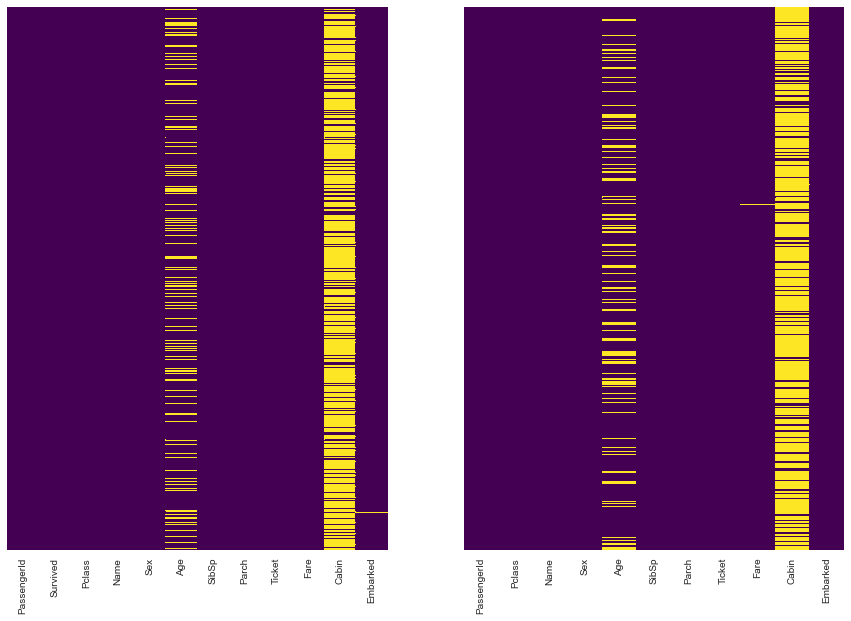

In [62]:
f, ax = plt.subplots(1,2,figsize=(15,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[0])
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[1])

**D.1 Filling missing values in Age**

Let's look at the box plots 1st:

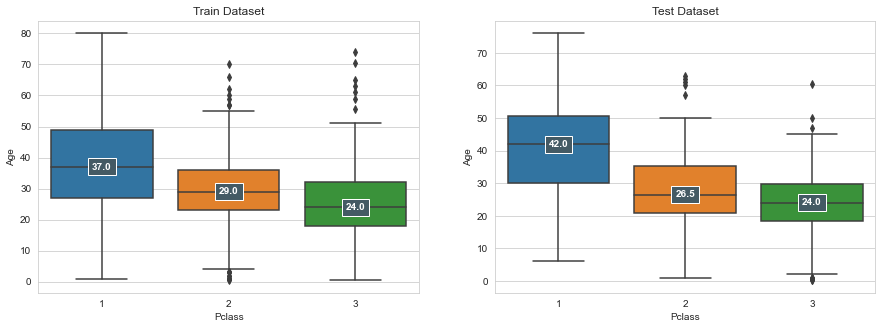

In [63]:
#helper function to draw box plot

def fun_draw_box_plot(fig, sbplt_no, data_in, title):
    # 1st Subplot
    ax = fig.add_subplot(1, 2, sbplt_no)

    # Box Plot for Age by Pclass for Train Data
    ax.set_title(title)

    # Settings to display median values
    box_plot_train = sns.boxplot(x='Pclass',y='Age',data=data_in)
    ax_train = box_plot_train.axes
    lines_train = ax_train.get_lines()
    categories_train = ax_train.get_xticks()

    for cat in categories_train:
        # Median line is the 4th line in a range of 6 lines:
        # 0: 25th percentile, 1: 75th percentile, 2: lower whisker, 3: upper whisker, 4: median, 5: upper extreme value
        y = round(lines_train[4+cat*6].get_ydata()[0],1) 

        ax_train.text(cat, y, f'{y}', ha='center', va='center', fontweight='bold',
                      size=10, color='white', bbox=dict(facecolor='#445A64'))

# Now call the function to plot the data.
fig = plt.figure(figsize=(15,5))

fun_draw_box_plot(fig, 1, train, 'Train Dataset' )
fun_draw_box_plot(fig, 2, test, 'Test Dataset' )

In [64]:
test.groupby('Pclass')['Age'].median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

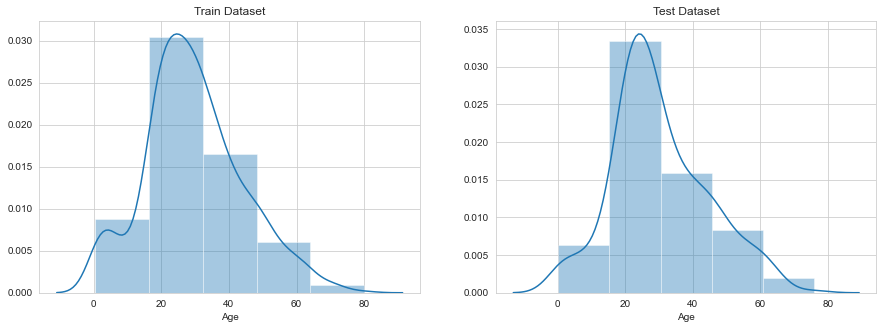

In [65]:
def fun_draw_histogram(fig, sbplt_no, data_in, title):
    ax = fig.add_subplot(1,2,sbplt_no)
    ax.set_title(title)
    sns.distplot(data_in['Age'].dropna(), kde=True, bins=5)

# Set Figure Size
fig=plt.figure(figsize=(15,5))

# call functions for both test and train.
fun_draw_histogram(fig,1,train, 'Train Dataset')
fun_draw_histogram(fig,2,test, 'Test Dataset')
    

From the histogram avove it is clear that ages have right-skewed distribution so we are filling the missing data by median.

In [66]:
def fill_age_train(cols):
    Age = cols[0]
    PClass = cols[1]
    
    if pd.isnull(Age):
        if PClass == 1:
            return 37
        elif PClass == 2:
            return 29
        else:
            return 24
    else:
        return Age

def fill_age_test(cols):
    Age = cols[0]
    PClass = cols[1]
    
    if pd.isnull(Age):
        if PClass == 1:
            return 42
        elif PClass == 2:
            return 26.5
        else:
            return 24
    else:
        return Age

# Filling missing vvalue for age
train['Age'] = train[['Age','Pclass']].apply(fill_age_train,axis=1)
test['Age'] = test[['Age','Pclass']].apply(fill_age_test,axis=1)

# Filling missing vlues in Fare, Cabin and Embarked
test['Fare'].fillna(stat.mode(test['Fare']),inplace=True)
train['Embarked'].fillna('S',inplace=True)
train['Cabin'].fillna('No Cabin',inplace=True)
test['Cabin'].fillna('No Cabin',inplace=True)

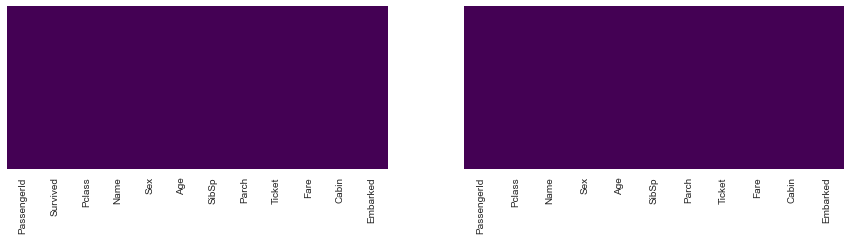

In [67]:
f,ax = plt.subplots(1,2,figsize=(15,3))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[0])
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[1])

In [68]:
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

#train.drop('PassengerId',axis=1,inplace=True)
#test.drop('PassengerId',axis=1,inplace=True)


Now data is complete no missing value and unnecessary columns are removed. We are ready for feature engineering

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,No Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,No Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,No Cabin,S


### Feature Engineering

We are concatinating the test and training data for the feature engineering. To identify test and training data we are using flag IsTrain 0/1. Once feature engineering is performed we need to detach test and train data.

In [70]:
train['IsTrain'] = 1
test['IsTrain'] = 0
df=pd.concat([train, test])

In [71]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsTrain
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,No Cabin,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,No Cabin,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,No Cabin,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,8.0500,No Cabin,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,No Cabin,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,8.0500,No Cabin,S,0


BOth train and test data is concated now with the flag IsTrain. After feature engineering is complete we will retrived  two different set using same flag.

If you populate the data you will see for the test datas Survived is NaN.

In [72]:
# Scaler Initiation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Feature Engineering: Name->Title

In [73]:
df['Title'] = df['Name'].str.split(', ').str[1].str.split('.').str[0]
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Don               1
Sir               1
Mme               1
Capt              1
Lady              1
the Countess      1
Dona              1
Name: Title, dtype: int64

In [74]:
df['Title'].replace(['Mme','Ms','Lady','Dona'],'Mrs', inplace=True)
df['Title'].replace(['Jonkheer','Mlle'], 'Miss', inplace=True)
df['Title'].replace(['Sir','Don'], 'Mr', inplace=True)
df['Title'].replace(['Dr','Rev','Col','Major','Capt','the Countess'],'Others',inplace=True)
df['Title'].value_counts()

Mr        759
Miss      263
Mrs       202
Master     61
Others     24
Name: Title, dtype: int64

In [75]:
df.drop('Name', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsTrain,Title
0,1,0.0,3,male,22.0,1,0,7.2500,No Cabin,S,1,Mr
1,2,1.0,1,female,38.0,1,0,71.2833,C85,C,1,Mrs
2,3,1.0,3,female,26.0,0,0,7.9250,No Cabin,S,1,Miss
3,4,1.0,1,female,35.0,1,0,53.1000,C123,S,1,Mrs
4,5,0.0,3,male,35.0,0,0,8.0500,No Cabin,S,1,Mr


In [76]:
df_temp = df[(df['Title'] == 'Master') & (df['Age'] > 18)]
df_temp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsTrain,Title
65,66,1.0,3,male,24.0,1,1,15.2458,No Cabin,C,1,Master
159,160,0.0,3,male,24.0,8,2,69.5500,No Cabin,S,1,Master
176,177,0.0,3,male,24.0,3,1,25.4667,No Cabin,S,1,Master
709,710,1.0,3,male,24.0,1,1,15.2458,No Cabin,C,1,Master
244,1136,NaN,3,male,24.0,1,2,23.4500,No Cabin,S,0,Master
339,1231,NaN,3,male,24.0,0,0,7.2292,No Cabin,C,0,Master
344,1236,NaN,3,male,24.0,1,1,14.5000,No Cabin,S,0,Master
417,1309,NaN,3,male,24.0,1,1,22.3583,No Cabin,C,0,Master


Master title is given for those whose age is below 18 years. But our data filling mechanism has filled meadian age for all the missing value. In above data set we cans see data with title 'Master'  with age 24. 

Lets correct above result set.

In [77]:
def fill_master_age(cols):
    Age = cols[0]
    Title = cols[1]

    if (Title == 'Master' and Age > 18.0):
        return 18.0
    else:
        return Age
    
df['Age']  = df[['Age', 'Title']].apply(fill_master_age, axis=1)

Now approsimately we are good with age.  Lets check it.

In [78]:
df_temp = df[(df.Title.eq('Master')) & (df['Age'] > 18)]
df_temp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsTrain,Title


**E.2 Feature Engineering: Age -> AgeGroup**

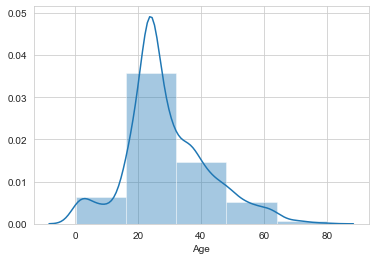

In [79]:
sns.distplot(df['Age'],bins=5)

I'll divide the ages to 5 categories: Children (<=19), Young Adults (>19, <=30), Adults (>30, <=45), Middle Aged (>45, <=63), Seniors (>63), 

with: **Children = 0, Young Adults = 1, Adults = 2, Middle Aged = 3, Seniors = 4**

In [80]:
df['AgeGroup'] = df['Age']
df.loc[df['AgeGroup']<=19, 'AgeGroup'] = 0
df.loc[(df['AgeGroup']>19) & (df['AgeGroup']<=30), 'AgeGroup'] = 1
df.loc[(df['AgeGroup']>30) & (df['AgeGroup']<=45), 'AgeGroup'] = 2
df.loc[(df['AgeGroup']>45) & (df['AgeGroup']<=63), 'AgeGroup'] = 3
df.loc[df['AgeGroup']>63, 'AgeGroup'] = 4

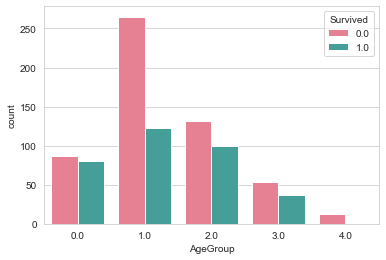

In [81]:
sns.countplot(x='AgeGroup',hue='Survived',data=df[df['IsTrain']==1],palette='husl')

In [82]:
df.drop('Age',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,IsTrain,Title,AgeGroup
0,1,0.0,3,male,1,0,7.2500,No Cabin,S,1,Mr,1.0
1,2,1.0,1,female,1,0,71.2833,C85,C,1,Mrs,2.0
2,3,1.0,3,female,0,0,7.9250,No Cabin,S,1,Miss,1.0
3,4,1.0,1,female,1,0,53.1000,C123,S,1,Mrs,2.0
4,5,0.0,3,male,0,0,8.0500,No Cabin,S,1,Mr,2.0


In [83]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 #himself
df['IsAlone'] = 0
df.loc[df['FamilySize']==1, 'IsAlone'] = 1

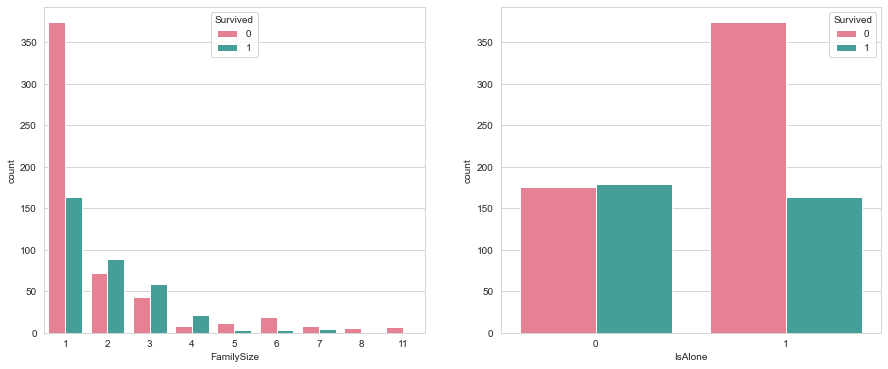

In [84]:
# Visual Inspection of Survival Rates

f,ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(df[df['IsTrain']==1]['FamilySize'],hue=train['Survived'],ax=ax[0],palette='husl')
sns.countplot(df[df['IsTrain']==1]['IsAlone'],hue=train['Survived'],ax=ax[1],palette='husl')


From the figures above, we can see that if a passenger has family onboard, **the survival rate will increase to approximately 50%.**

Since we already have the information using IsAlone feature only, *we'll just drop SibSp, Parch, and FamilySize*

In [85]:
df.drop(['SibSp','Parch','FamilySize'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Fare,Cabin,Embarked,IsTrain,Title,AgeGroup,IsAlone
0,1,0.0,3,male,7.2500,No Cabin,S,1,Mr,1.0,0
1,2,1.0,1,female,71.2833,C85,C,1,Mrs,2.0,0
2,3,1.0,3,female,7.9250,No Cabin,S,1,Miss,1.0,1
3,4,1.0,1,female,53.1000,C123,S,1,Mrs,2.0,0
4,5,0.0,3,male,8.0500,No Cabin,S,1,Mr,2.0,1


**E.4 Feature Engineering: Cabin -> Deck**

In [86]:
df['Deck'] = df['Cabin']
df.loc[df['Deck']!='No Cabin','Deck'] = df[df['Cabin']!='No Cabin']['Cabin'].str.split().apply(lambda x: np.sort(x)).str[0].str[0]
df.loc[df['Deck']=='No Cabin','Deck'] = 'N/A'

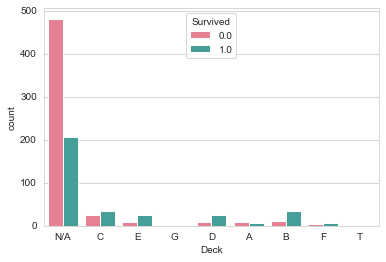

In [87]:
sns.countplot(x='Deck',hue='Survived',data=df[df['IsTrain']==1],palette='husl')

In [88]:
df.loc[df['Deck']=='N/A', 'Deck'] = 0
df.loc[df['Deck']=='G', 'Deck'] = 1
df.loc[df['Deck']=='F', 'Deck'] = 2
df.loc[df['Deck']=='E', 'Deck'] = 3
df.loc[df['Deck']=='D', 'Deck'] = 4
df.loc[df['Deck']=='C', 'Deck'] = 5
df.loc[df['Deck']=='B', 'Deck'] = 6
df.loc[df['Deck']=='A', 'Deck'] = 7
df.loc[df['Deck']=='T', 'Deck'] = 8

In [89]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,IsTrain,Title,AgeGroup,IsAlone,Deck
0,1,0.0,3,male,7.2500,S,1,Mr,1.0,0,0
1,2,1.0,1,female,71.2833,C,1,Mrs,2.0,0,5
2,3,1.0,3,female,7.9250,S,1,Miss,1.0,1,0
3,4,1.0,1,female,53.1000,S,1,Mrs,2.0,0,5
4,5,0.0,3,male,8.0500,S,1,Mr,2.0,1,0


In [90]:
# Debug
# df.Title.unique()

**E.5 Feature Engineering -> Scaling**

In this part, any features with level of measurement nominal -> ordinal would be scaled from 0 to 1: they are **Fare, Pclass, and Deck**:

In [91]:
df[['Fare','Pclass','Deck']] = scaler.fit_transform(df[['Fare','Pclass','Deck']])
df.head()
# df.Title.unique()
df.Deck.unique()

array([0.   , 0.625, 0.375, 0.125, 0.5  , 0.875, 0.75 , 0.25 , 1.   ])

**F. FINAL DATA PREPARATION**

We now have all the features. Finally, on data preprocessing, we need to create dummies for categorical data and produce a new DataFrame. The features to preprocess are: **Embarked, Sex, Title, AgeGroup**.

In [92]:
# ONE HOT ENCODING: {A -Z}
# LABEL ENCODING {A: 1, B: 2}
# https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

def process_dummies(df,cols):
    for col in cols:
        dummies = pd.get_dummies(df[col],prefix=col,drop_first=True)
        df = pd.concat([df.drop(col,axis=1),dummies],axis=1)
    return df
df = process_dummies(df,['Embarked','Sex','Title','AgeGroup'])
df.head()

,PassengerId,Survived,Pclass,Fare,IsTrain,IsAlone,Deck,Embarked_Q,Embarked_S,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Others,AgeGroup_1.0,AgeGroup_2.0,AgeGroup_3.0,AgeGroup_4.0
0,1,0.0,1.0,0.014151,1,0,0.000,0,1,1,0,1,0,0,1,0,0,0
1,2,1.0,0.0,0.139136,1,0,0.625,0,0,0,0,0,1,0,0,1,0,0
2,3,1.0,1.0,0.015469,1,1,0.000,0,1,0,1,0,0,0,1,0,0,0
3,4,1.0,0.0,0.103644,1,0,0.625,0,1,0,0,0,1,0,0,1,0,0
4,5,0.0,1.0,0.015713,1,1,0.000,0,1,1,0,1,0,0,0,1,0,0


**F.1 Divide df to train dataset and holdout for final testing purpose**

Before we continue to the prediction section, let's divide our data again to **dataset** (formerly train data) and **holdout** (formerly test data):

In [93]:
dataset = df[df['IsTrain']==1]
dataset.drop(['IsTrain','PassengerId'],axis=1,inplace=True)
holdout = df[df['IsTrain']==0]
test_id = holdout['PassengerId']
holdout.drop(['IsTrain','PassengerId','Survived'],axis=1,inplace=True)

In [ ]:
# Debug code.
# df.head()
# dataset.head()
# holdout.head()
# test_id.head()

In [94]:
X = dataset
train_columns = X.columns
Y = dataset["Survived"]
X.drop(['Survived'],axis=1,inplace=True)


X_test = holdout

print(X.shape,Y.shape,X_test.shape)
print (X.columns)
print(X_test.columns)

(891, 15) (891,) (418, 15)
Index(['Pclass', 'Fare', 'IsAlone', 'Deck', 'Embarked_Q', 'Embarked_S',
       'Sex_male', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others',
       'AgeGroup_1.0', 'AgeGroup_2.0', 'AgeGroup_3.0', 'AgeGroup_4.0'],
      dtype='object')
Index(['Pclass', 'Fare', 'IsAlone', 'Deck', 'Embarked_Q', 'Embarked_S',
       'Sex_male', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others',
       'AgeGroup_1.0', 'AgeGroup_2.0', 'AgeGroup_3.0', 'AgeGroup_4.0'],
      dtype='object')


## Decision Tree
A decision tree is tree-like model of decisions and their possible consequences,including chance event outcomes, resource costs, and utility.
![image.png](attachment:image.png)

In [117]:
from sklearn.tree import DecisionTreeClassifier

#decision_tree = DecisionTreeClassifier() 
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=45)
decision_tree.fit(X, Y)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X, Y) * 100, 2)
acc_decision_tree

83.16

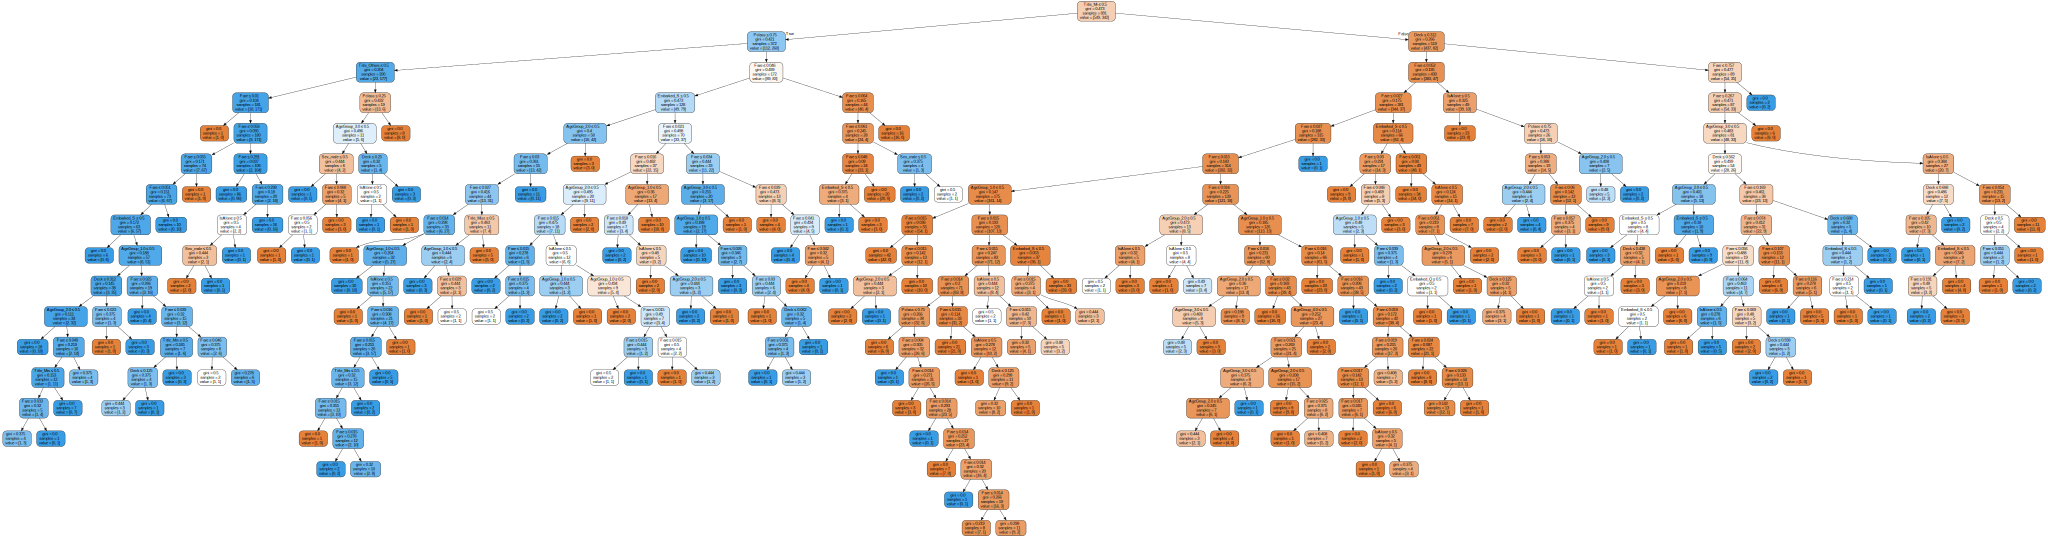

In [113]:
# install graphviz with following command  in andaconda cli
# conda install python-graphviz 
import graphviz 
import sklearn.tree as tree

dot_data = tree.export_graphviz(decision_tree, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = X.columns) 
graph = graphviz.Source(dot_data)
graph.view()
graph

In [109]:
with open("titanic.png", "w") as f:
    tree.export_graphviz(decision_tree, out_file=f, feature_names=X.columns)

**Model Validation.**

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(), X, Y, cv=10).mean()

0.8114856429463171

***GRIDSearch***

In [118]:
param_grid = {'min_samples_leaf':np.arange(20,50,5),
              'min_samples_split':np.arange(20,50,5),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}
clf = DecisionTreeClassifier()
tree_search = GridSearchCV(clf, param_grid, scoring='average_precision')


tree_search.fit(X,Y)

print("Tree best parameters :",tree_search.best_params_)
print("Tree best estimator :",tree_search.best_estimator_ )
print("Tree best score :",tree_search.best_score_ )

Tree best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 45, 'min_weight_fraction_leaf': 0.0}
Tree best estimator : DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=45)
Tree best score : 0.8236379220473505


In [119]:
tree_best_parameters = tree_search.best_params_
tree_optimized = DecisionTreeClassifier(**tree_best_parameters)
tree_optimized.fit(X,Y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=45)

## Prediction on test data

In [120]:

prediction_values = tree_optimized.predict(X_test).astype(int)
prediction = pd.DataFrame({"PassengerId":test_id,
                           "Survived":prediction_values})

prediction.head()
#prediction.to_csv("Titanic_tree_prediction.csv",index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


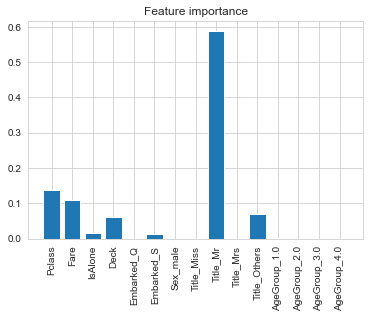

In [121]:
train_columns = list(X.columns)
fig, ax = plt.subplots( figsize=(6,4))
ax.bar(range(len(X.columns)),tree_optimized.feature_importances_ )
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
ax.set_title("Feature importance")
plt.show()


## Prediction Evaluation
https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)


evaluation = {}
cm = {}

tree_optimized = DecisionTreeClassifier(**tree_best_parameters)
tree_optimized.fit(X_train, y_train)
evaluation["tree"] = tree_optimized.predict(X_test).astype(int)


print(y_test.value_counts())

cm["tree"] = confusion_matrix(y_test, evaluation["tree"])
cm["tree"] = cm["tree"].astype('float') / cm["tree"].sum(axis=1)[:, np.newaxis]

cm["tree"]

0.0    105
1.0     74
Name: Survived, dtype: int64


array([[0.82857143, 0.17142857],
       [0.22972973, 0.77027027]])

In [123]:
evaluation["tree"]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [124]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.82857143 0.17142857]
 [0.22972973 0.77027027]]


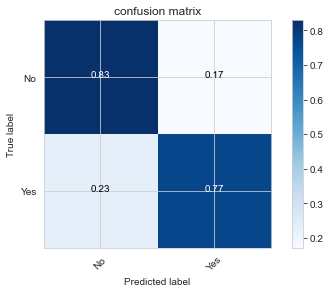

In [125]:
plot_confusion_matrix(cm["tree"], classes=["No","Yes"],  title='confusion matrix')

## ROC Curve

#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


In [126]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

dt_auc = roc_auc_score(y_test, evaluation["tree"])
# summarize scores
print('Logistic: ROC AUC=%.3f' % (dt_auc))

Logistic: ROC AUC=0.799


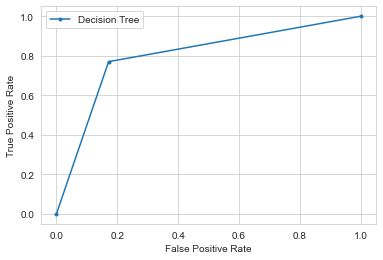

In [127]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, evaluation["tree"])

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Classificaiton report

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, evaluation["tree"], target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.84      0.83      0.83       105
         Yes       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

